<a href="https://colab.research.google.com/github/KingAgastya/Clustering/blob/main/Clustering_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
fileData = files.upload()

Saving data.csv to data.csv


In [2]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
fileInfo = pd.read_csv('data.csv')

size = fileInfo['Size'].tolist()
light = fileInfo['Light'].tolist()

fig = px.scatter(x = size, y = light)
fig.show()

In [4]:
x = fileInfo.iloc[:, [0, 1]].values

wcss = []

for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 535674)
  kmeans.fit(x)

  wcss.append(kmeans.inertia_)

print(wcss)

[4647.672578846852, 1335.074701936051, 445.441990087426, 245.80054062256517, 195.08067872220818, 149.64913377189546, 120.54590203698828, 101.28753581335212, 87.29475687140086, 77.40612169988827]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



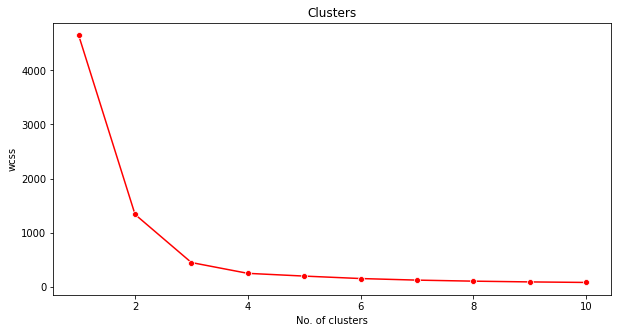

In [5]:
plt.figure(figsize = (10, 5))
sns.lineplot(range(1, 11), wcss, marker = 'o', color = '#ff0000')

plt.title('Clusters')
plt.xlabel('No. of clusters')
plt.ylabel('wcss')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning

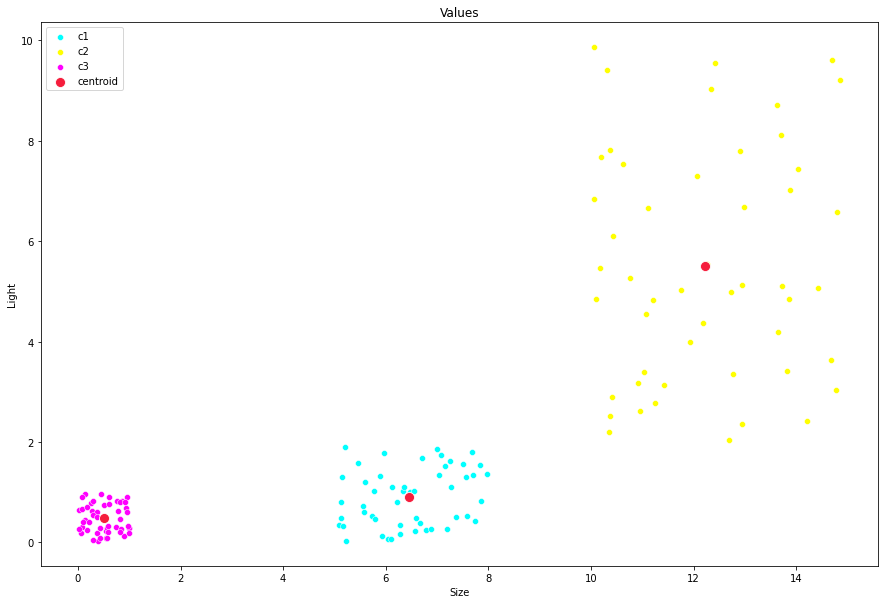

In [6]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 535674)
y_kmeans = kmeans.fit_predict(x)

plt.figure(figsize = (15, 10))
sns.scatterplot(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], color = '#00ffff', label = 'c1')
sns.scatterplot(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], color = '#ffff00', label = 'c2')
sns.scatterplot(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], color = '#ff00ff', label = 'c3')

sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = '#f51d3c', label = 'centroid', s = 100)

plt.title('Values')
plt.xlabel('Size')
plt.ylabel('Light')
plt.show()